This notebook will introduce a python implementation of the lattice boltzmann methos. 

# The Boltzmann Equation

# The Lattice Boltzmann Method

# Representing the Lattice

Let's take a look at the D2Q9 lattice object defined in the other file. The D2Q9 lattice has 2 dimensions and 9 directions. 

In [1]:
from lbm_new_v4 import D2Q9

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (12, 8)

N = M = 9
sim = D2Q9(N, M)

print('D2Q9 Properties')
print('===========')
for key in sim.__dict__.keys():
    print('{}     {}'.format(key, np.shape(getattr(sim, key))))
print('')
print('------------')
for key in ['N', 'M', 'dct', 'opp', 'w', 'cs']:
    print('{}     {}'.format(key, getattr(sim, key)))


D2Q9 Properties
N     ()
M     ()
DCT     (9, 2, 11, 11)
rho     (11, 11)
vx     (11, 11)
vy     (11, 11)
f     (9, 11, 11)
fs     (9, 11, 11)
feq     (9, 11, 11)
_solid     (11, 11)
_SOLID     (9, 11, 11)
wall     (9, 11, 11)
WALL     (9, 11, 11)
WALL_DCT     (9,)
walls     (11, 11)
NOWALL     (9, 11, 11)

------------
N     9
M     9
dct     [(0, 0), (1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]
opp     [0, 3, 4, 1, 2, 7, 8, 5, 6]
w     [0.4444444444444444, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776]
cs     0.5773502691896258


/home/jackie/Desktop/Docs_old/Classes/Lattice Boltzmann project/new code/lbm_new_v4.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self._SOLID = np.array([mask - mask[self.DCT[i]] for i in range(9)])


An $N$x$M$ lattice has a numerical domain of size $N+2$, $M+2$ because we designate nodes x={0, N}, y={0, M} as boundaries. The 9 directions *dct*, the 9 indices *opp* indicating the opposite direction; the weights *w*; and the speed *cs* in lattice units are generic properties of the D2Q9 lattice, which are defined in the class scope.

The underlying system is represented by the fluid variables $\rho$, $v_x$, and $v_y$; which are related to the particle distribution functions $f$, $f_s$, and $f_{eq}$; or the propability of finding a particle at position $(x, y)$ traveling in direction $i$. $f$ and $f_s$ correspond to the distributions just after streaming and collision respectively, and $f_{eq}$ is the equilibrium distribution computed using the local fluid variables. These fields are empty for now. 

The D2Q9 class has some build-in methods for visualizing these fields:

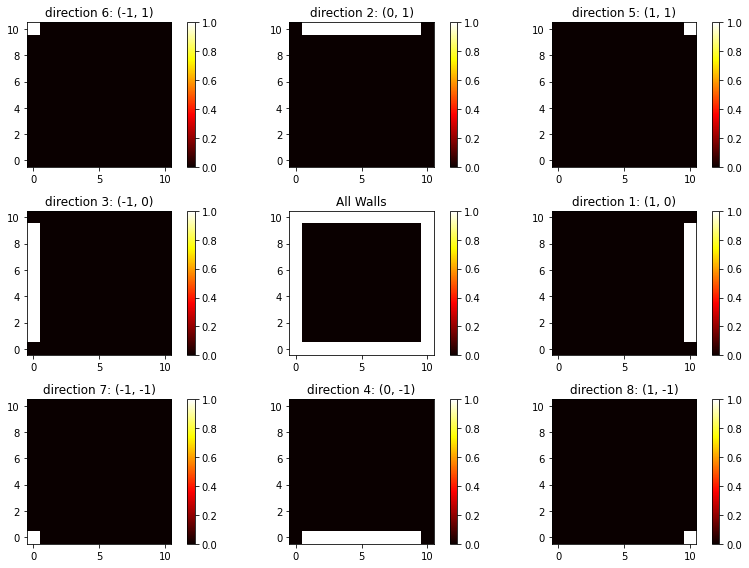

In [2]:
plt.figure(figsize=(12, 8)) 
sim.imshow9(sim.wall)           #### Display a 9x(M+2)x(M+2) object as 9 fields corresponding to dct[i]
plt.subplot(3, 3, 5)
sim.imshow(sim.walls)           #### Display a single (N+2)x(M+2) field as a tilemap
plt.title('All Walls')
plt.tight_layout()
# plt.suptitle('Walls Correspondin to Each Direction')
plt.show()


In [3]:
sim.rho += .1
sim.tau = 1e6

/home/jackie/Desktop/Docs_old/Classes/Lattice Boltzmann project/new code/lbm_new_v4.py:151: RuntimeWarning: divide by zero encountered in true_divide
  self.vx += (1.0/self.rho)*self.f[I]*ex;
/home/jackie/Desktop/Docs_old/Classes/Lattice Boltzmann project/new code/lbm_new_v4.py:151: RuntimeWarning: invalid value encountered in multiply
  self.vx += (1.0/self.rho)*self.f[I]*ex;
/home/jackie/Desktop/Docs_old/Classes/Lattice Boltzmann project/new code/lbm_new_v4.py:152: RuntimeWarning: divide by zero encountered in true_divide
  self.vy += (1.0/self.rho)*self.f[I]*ey;
/home/jackie/Desktop/Docs_old/Classes/Lattice Boltzmann project/new code/lbm_new_v4.py:152: RuntimeWarning: invalid value encountered in multiply
  self.vy += (1.0/self.rho)*self.f[I]*ey;
/home/jackie/Desktop/Docs_old/Classes/Lattice Boltzmann project/new code/lbm_new_v4.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

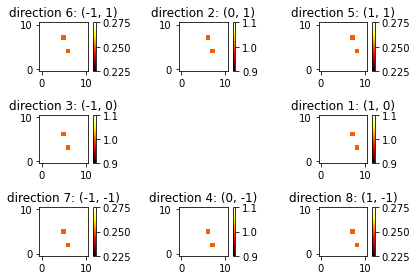

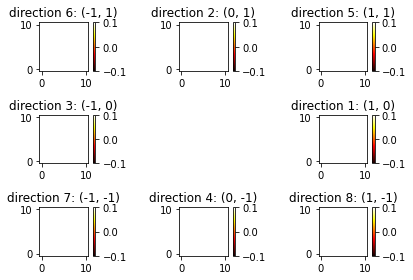

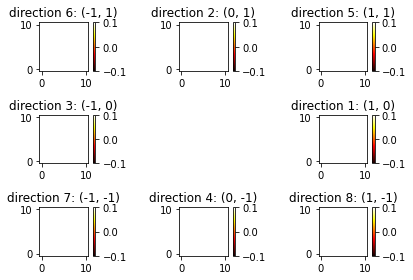

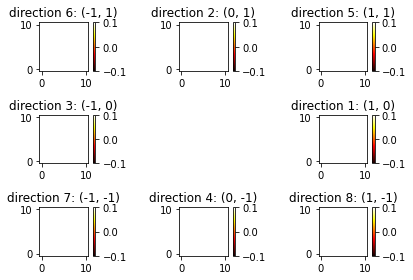

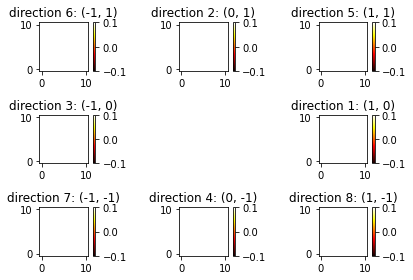

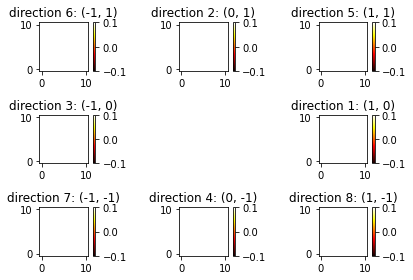

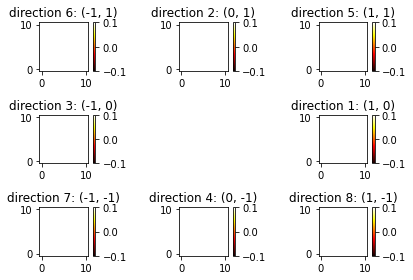

You ran the wrong file, but you 're still doing a great job bud


In [4]:
  
    #### First: Let's construct a lattice to test just the streaming
#     test.tau = 1e8 #### This makes collision operator essentially f = fs; i.e. no collision
    sim.f[:, 5, 5] = 1          #### Instantiate f=1 at center in all directions
    sim.f[:, 6, 2] = 1

    sim.tau = 1
    f0 = sim.f.copy()
    #### Stream everything
    for i in range(7):
        sim.iterate(.1)
        sim.imshow9(sim.f)
        plt.show()
#         sim.t += s
#         sim.fs = sim.f
        
#         sim.Stream()
#         sim.show
    
#     #### Stream everything except walls
#     test.f = f0.copy()
#     for i in range(7):
#         test.fs = test.f
#         test.start_Stream()
#         test.stream_Fluid()
        
        
#    #### Stream everything, but stream walls seperately (i.e. non-periodic)
#     test.f = f0.copy()
#     for i in range(7):
#         test.fs = test.f
#         test.start_Stream()
#         test.stream_Fluid()
#         test.stream_Walls()
        
#     test.f = f0.copy()
# #     test.solid[2:4, 2:4] = 1
#     test.updateSolid()
#     for i in range(7):
#         test.fs = test.f
#         test.displayStream()
#         test.Stream()
# #         test.stream_Fluid()
# #         test.stream_Walls()
# #         test.bounce_Solid()
# #         test.boundary()
#         test.bounce_walls()
#         test.boundary()
#         test.Bounce(self.solid)
#         test.Bounce(self.solid)
        
    
    
#     test.f = f0.copy()
#     test.solid[2:4, 2:4] = 1
#     test.updateSolid()
# #     test.updateFluid()
#     test.displayBounce(True)
                       
                       
#     for i in range(7):
#         test.fs = test.f
#         test.tryStream()
    
    
    
    
    
#         plt.displayWalls()
#         plt.displaySolid()    
#     test = D2Q9(5, 5);
#     for I in range(9):
#         for i in range(7):
#             for j in range(7):
#                 test.f[I][i-1, j-1] = 7*i + j;
#                 if(i<5 and j<5):
#                     test.fs[I][i, j] = 50*(j+1) + 5*i ;
#                 else:
#                     test.fs[I][i, j] = 8
#                 test.f[I] = 1.0*test.fs[I];

#     s = 1;
#     test.plotF();
#     while(test.t<3*s):
#         print(self.fluid[
#         test.iterate(s);
#         test.plotFs();
#         test.plotF();

##    N = 7;
##    M = 7;
##    test = np.ones([N, M]);
##    solid = np.ones([N, M]);
##    for i in range(2):
##        for j in range(2):
##            solid[i+3,j+3] = 0;
##    test = test*solid;
##    plt.imshow(test);
##    plt.show();
    print("You ran the wrong file, but you 're still doing a great job bud")




Using Half Bounce-Back


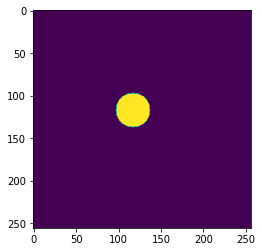

In [8]:
from poiseuille_new_v4 import poiseuille as pois
N = 254
M = 254

sim2 = pois(N, M, 1.1, 0.9, 1, 1)

mask = sim2.solid
#     mask = np.load('dla_2d.npy')

r0 = (int(N/2), int(M/2)) 
r = 20

for i in range(-r, r+1):
    li = int(np.sqrt(abs(r**2 - i**2)))
    for j in range(-li, li+1):
        mask[i + r0[0] - int(r/2), j + r0[1] - int(r/2)] = 1
# for i in range(r0[0] - int(r/2), r0[0]+int(r/2)+1):
#     li = r**2 - i**2
#     for j in range(r0[1] - int(li/2), r0[1] + int(li/2)+1):
#         mask[i, j] = 1
        

plt.imshow(mask)
plt.show()

rho = (1.0/sim2.cs**2)*np.ones([N+2, M+2]);
rho[-1, :] = (1.1/sim2.cs**2)*np.ones(M+2);
rho[N, :] = (0.9/sim2.cs**2)*np.ones(M+2);
vx = 1*np.zeros([N+2,M+2]);
vy = np.zeros([N+2,M+2]);
for I in range(9):
    sim2.updateEq(rho, vx, vy);
    sim2.f[I] = sim2.feq[I];# sim2.updateEq(rho, vx, vy)

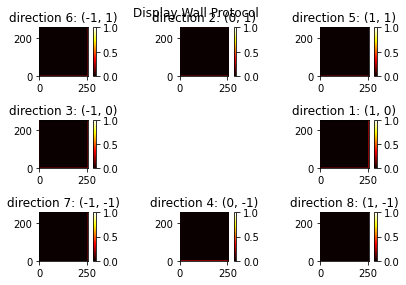

/home/jackie/Desktop/Docs_old/Classes/Lattice Boltzmann project/new code/lbm_new_v4.py:251: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask = [self.SOLID[I] + 0.1*self.SOLID[I][self.DCT[self.opp[I]]] for I in range(9)]


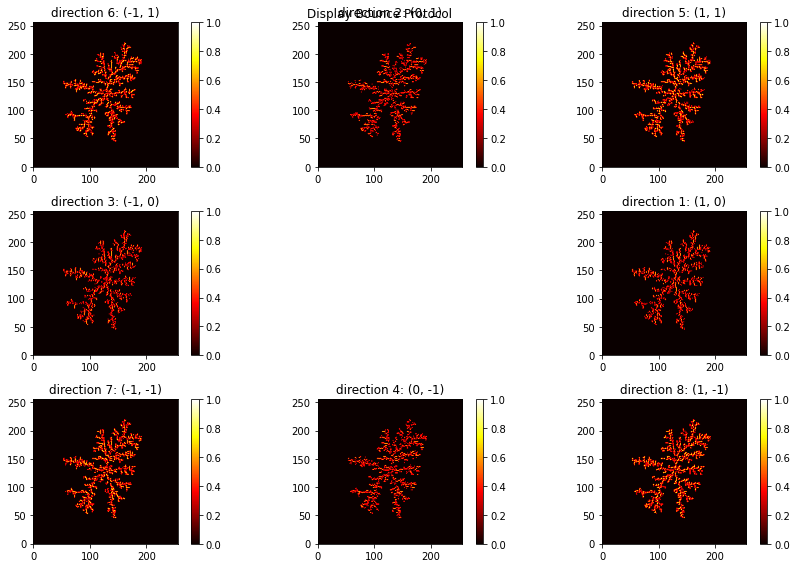

In [10]:
sim2.displayWalls()
plt.show()
sim2.solid = mask
plt.figure(figsize=(12, 8))
sim2.displayBounce()
plt.show()

In [9]:
mask = np.load('dla_2d.npy')
sim2.addSolid(mask)

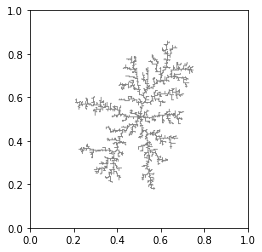

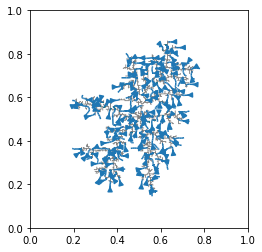

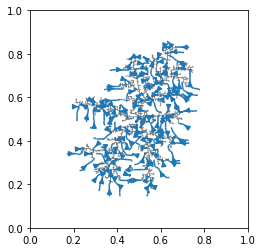

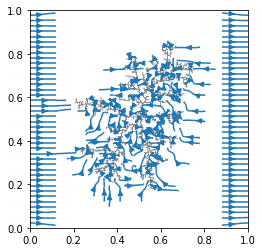

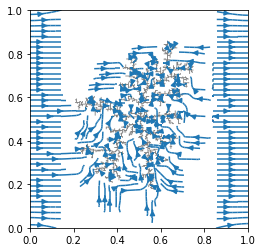

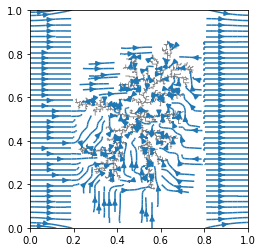

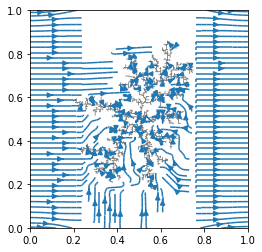

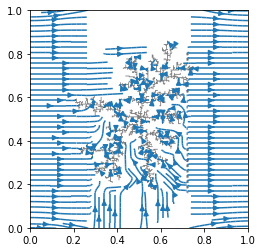

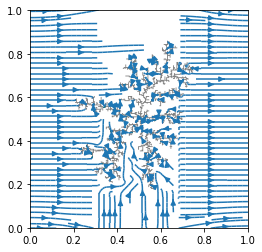

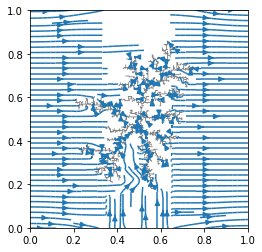

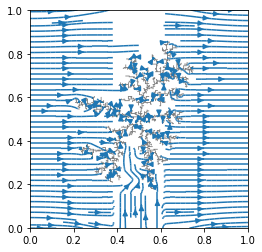

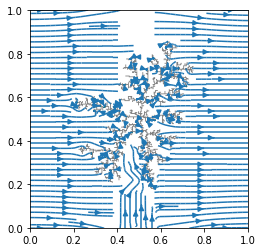

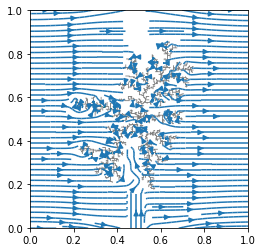

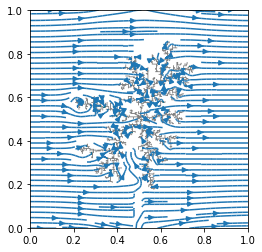

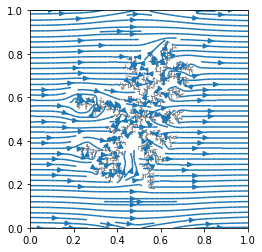

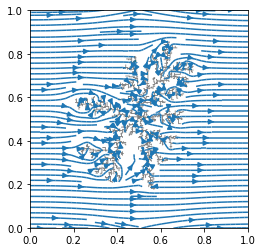

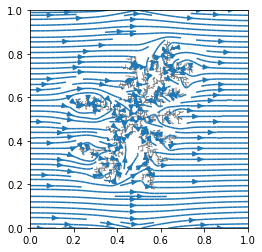

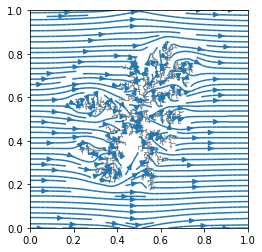

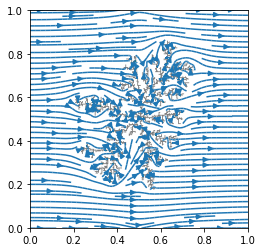

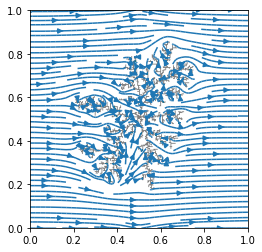

In [11]:
for i in range(200):
    sim2.iterate(0.1)
    if i%10==0:
        sim2.plotFlow()
#         sim2.plotVorticity()
        plt.show()
    